#### based on Figs. 1 from Abdul-Razzak and Ghan 2000 (JGR: Atmos.)  "_A parameterization of aerosol activation: 2. Multiple aerosol types_"
http://doi.wiley.com/10.1029/1999JD901161

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from matplotlib import pyplot
from atmos_cloud_sim_uj_utils import show_plot
from PySDM.physics import si

from PySDM_examples.Abdul_Razzak_Ghan_2000.run_ARG_parcel import run_parcel
from PySDM_examples.Abdul_Razzak_Ghan_2000.data_from_ARG2000_paper import (
    Fig1_N2_obs, Fig1_AF_obs, Fig1_N2_param, Fig1_AF_param,
)
from PySDM_examples.Abdul_Razzak_Ghan_2000.data_from_CloudMicrophysics_ARG import (
    Fig1_N2_param_jl, Fig1_AF_param_jl_B,
)
n_sd_per_mode = 10

In [3]:
N2 = np.linspace(100,5000,5) / si.cm**3
AF_S = np.zeros((2,len(N2)))
AF_V = np.zeros((2,len(N2)))
AFerror = np.zeros(len(N2))

w = 0.5 * si.m / si.s
sol2 = 1.0 # 100% ammonium sulfate
rad2 = 50.0 * si.nm

for i,N2i in enumerate(N2):
    output = run_parcel(w, sol2, N2i, rad2, n_sd_per_mode)
    AF_S[:,i] = output.activated_fraction_S
    AF_V[:,i] = output.activated_fraction_V
    AFerror[i] = output.error[0]


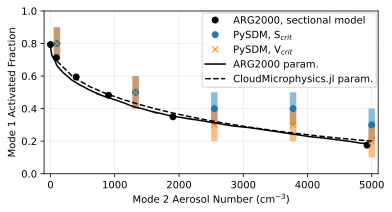

HTML(value="<a href='./joss-ARG-fig_1.pdf' target='_blank'>./joss-ARG-fig_1.pdf</a><br>")

In [5]:
fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(6,3))
ax.plot(Fig1_N2_obs, Fig1_AF_obs, "ko", label="ARG2000, sectional model")
ax.plot(N2 * si.cm**3, AF_S[0,:], marker='o', ls="None", color="C0", label="PySDM, S$_{crit}$")
ax.bar(N2 * si.cm**3, 2*AFerror, width=100, bottom=AF_S[0,:]-AFerror, color="C0", alpha=0.5)
ax.plot(N2 * si.cm**3, AF_V[0,:], marker='x', ls="None", color="C1", label="PySDM, V$_{crit}$")
ax.bar(N2 * si.cm**3, 2*AFerror, width=100, bottom=AF_V[0,:]-AFerror, color="C1", alpha=0.5)

ax.plot(Fig1_N2_param, Fig1_AF_param, "k-", label="ARG2000 param.")
ax.plot(Fig1_N2_param_jl, Fig1_AF_param_jl_B, "k--", label="CloudMicrophysics.jl param.")

ax.set_ylabel('Mode 1 Activated Fraction')
ax.set_ylim([0,1])
ax.set_xlabel('Mode 2 Aerosol Number (cm$^{-3}$)')
ax.set_xlim([-100,5100])
ax.grid(ls=":",lw=0.5)
pyplot.legend(loc="best", borderaxespad=0.2, borderpad=0.3)

show_plot("joss-ARG-fig_1.pdf")